# Data Visualization Lab

In [1]:
#Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.ndimage import imread
from scipy import special
from scipy import linalg as la

%matplotlib inline

## Problem 1
The file anscombe.npy contains Anscombe’s quartet.Plot each section of the quartet separately as a scatter plot. Also plot the regression line $y = \frac{1}{2}x + 3$ on the domain $x \in [0, 20]$ over each scatter plot.

Write a few sentences describing what makes each section unique.

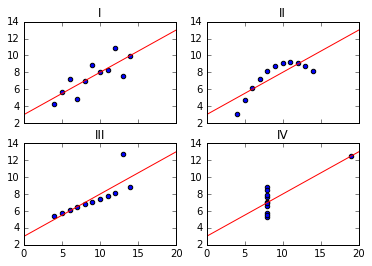

In [2]:
#Load the array
Anscombe = np.load("anscombe.npy")

#set up what the titles will be
titles = ['I', 'II', "III", "IV"]

#go through each column of Anscombe's quartet
for i in range(4):
    #go to right subplot
    plt.subplot(2,2,i+1)#add 1 to i to account for indexing off 1 in subplot command
    
    #title it
    plt.title(titles[i])
    
    #get x and y coordinates
    x_coordinates = Anscombe[:, 2*i + 0]
    y_coordinates = Anscombe[:, 2*i + 1]
    
    #plot the scatterplot
    plt.scatter(x_coordinates, y_coordinates)
    
    #plot the line y = (1/2)x + 3 on the interval [0,20]
    #just need the endpoints since plot just makes a straight lines between consecutive points
    x_coordinates = np.array([0, 20])
    y_coordinates = (1./2.)*x_coordinates + 3
    plt.plot(x_coordinates, y_coordinates, "r-")
    
    #set the x limits to be from 0 to 20
    plt.xlim(0,20)
    
    #turn off the bottom labels for the top 2 cells
    if i == 0 or i == 1:
        plt.tick_params(labelbottom='off')
    
plt.show()

In [3]:
"""
Descriptions:
    I
    This one looks like it's just somewhat scattered,  but that there is a bit of a linear
    relation between the x and y coordinate
    
    II
    There seems to be a quadratic relation between the x and y points
    
    III
    The data seems to have a strong linear relation that is broken by one outlier, which skews the regression line
    
    IV
    All of the x coordinates are at 8, with one outlier with and x coordinate at 19
"""
#Pointless pass to prevent the string comment from being displayed again by jupyter
pass

## Problem 2
The $n+1$ Berstein basis polynomials of degree $n$ are defined as follows:

$$\begin{align}B_{v,n} =  {{n}\choose{v}} x^v (1-x)^{n-v}     &&v \in \{0,1,2,\ldots,n \}\end{align}$$

Plot at least the first 10 Berstein basis polynomials ($n = 0,1,2,3$) as small multiples on the domain $[0,1] \times [0,1]$. Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of each plot to be the same. Consider arranging the subplots so that the rows correspond with n and the columns with v.

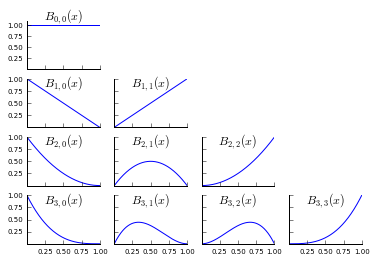

In [4]:
#Fun fact:the binomial coefficient (n choose v) can be efficiently computed with scipy.special.binom()
def Bernstein(n, v, x):
    """
    Inputs:
        n -- the degree of the polynomials
        v -- which of the nth degree berstein polynomials to use
        x -- an array of points to evaluate the polynomial at
    
    Returns B_{n,v} evaluated at the points in x
    """
    return sp.special.binom(n, v)* x**v * (1-x)**(n-v)

#Let n vary from 0 to 3
for n in range(4):
    #let v vary from 0 to n
    for v in range(n+1):
        #we will have a 4x4 plot.  The coordinates will be
        #1  2  3  4
        #5  6  7  8
        #9  10 11 12
        #13 14 15 16
        #notice the coordinate will be given by row*4 + column
        # n = row-1 and v = column-1 because this indexes off 1 instead 0
        ax = plt.subplot(4,4, (n)*4 + v+1)
        #^ax allows me to turn off the splines above and below
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        #We're going to set the vertical alignment to be 'top' when we're in the bottom rows,
        #But make it 'center' when we're at the top
        if n == 0:
            verticalalignment = 'center'
        else:
            verticalalignment = 'top'
        
        #Label the subplots for clarity
        #use latex -- r and $$ are the important parts to get latex to go
        plt.title(r"$B_{%d,%d}(x)$"%(n,v), fontdict={'fontsize':'large', 'verticalalignment':verticalalignment})
        #                                             ^                  ^
        #Made the title small enough to not-----------|                  |
        #write ontothe other graphs                                      |
        #                                                                |
        #Vertically align the title--------------------------------------|
        
        #get the domain for x
        x = np.linspace(0,1,200)
        #plot the Bernstein polynomial
        plt.plot(x, Bernstein(n,v,x))
        
        #set the x and y limits to be from 0 to 1
        plt.xlim(0,1)
        if n ==0:
            #B_{0,0} is the line y = 1, which doesn't show up if plt.ylim(0,1)
            plt.ylim(0,1.1)
        else:
            plt.ylim(0,1)
            
        #Adjust tick marks for simplicity
        
        #turn off the top and right ticks
        plt.tick_params(top = "off", right = "off")
        
        #Just make the ones on the left column have tick mark labels.
        if v != 0:#first column corresponds to v = 0
            plt.tick_params(labelleft = "off")
        else:
            plt.tick_params(labelleft = "on")
            
        #make only the bottom row have labels
        if n != 3: #3 is bottom row
            plt.tick_params(labelbottom = "off")
        else:
            plt.tick_params(labelbottom = "on")
            
        #make it so that we have only 4 tickmarks
        #exclude origin because ... no duh it's 0
        plt.xticks(np.linspace(.25,1,4))
        plt.yticks(np.linspace(.25,1,4))
        
        #change the size of the tick labels -- freakin' %matplotlib inline makes ridiculously small graphs
        plt.tick_params(labelsize = 'x-small')
        
#now show it when they all are done
plt.show()

## Problem 3
The file MLB.npy contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA. Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.
Describe the data with at least one scatter plot. Your graph(s) should
demonstrate whether height, weight, or age correlated with each other in the
MLB. Consider plotting linear regression lines to indicate trends.

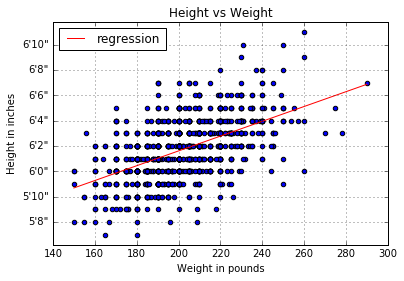

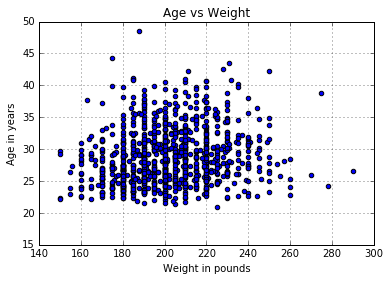

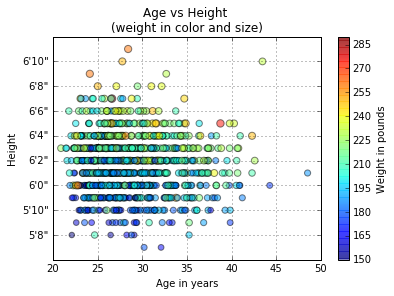

In [5]:
#load the MLB array
MLB = np.load("MLB.npy")

#heights are in the first column
heights = MLB[:,0]
#weights are in the second column
weights = MLB[:,1]
#ages are in the third column
ages = MLB[:,2]

#plot heights vs weights
plt.title("Height vs Weight")
plt.scatter(weights, heights)
#give it grid marks
plt.grid()
plt.ylabel("Height in inches")
plt.xlabel("Weight in pounds")

#make the height in feet and inches

#make the x_tick_labels
y_tick_labels = list()
for inches in range(68,84,2):
    feet = inches//12
    inches_left = inches - feet*12
    y_tick_labels.append(str(feet) + "\'" + str(inches_left) + "\"")

plt.yticks(range(68,84,2), y_tick_labels)

#Get the linear regression between them
def least_squares(A, b):
    """Calculate the least squares solutions to Ax = b using QR decomposition.

    Inputs:
        A ((m,n) ndarray): A matrix of rank n <= m.
        b ((m, ) ndarray): A vector of length m.

    Returns:
        x ((n, ) ndarray): The solution to the normal equation.
    """
    #Get the reduced QR decomposition
    Q,R = la.qr(A, mode = "economic")
    #Solve the triangular system Rx = Q^T b
    x_hat = la.solve_triangular(R, np.dot(Q.T, b))
    return x_hat

#Get the matrix A for Ax = b
A = np.vstack((weights,np.ones_like(weights)))
A = A.T
m,b = least_squares(A,heights)

#Get the extreme x coordinates
x = np.array([min(weights), max(weights)])
#plot the line that connects those two points on the regression line
plt.plot(x, m*x+b,'r',label="regression")
plt.legend(loc="upper left")
#show it
plt.show()

#plot age vs weight
plt.title("Age vs Weight")
plt.scatter(weights, ages)
plt.grid()
plt.ylabel("Age in years")
plt.xlabel("Weight in pounds")
plt.show()

#plot age vs height, and make the markers proportional to weight
plt.title("Age vs Height \n(weight in color and size)")
plt.scatter(ages, heights, s=weights*.2, c=(weights), alpha=.5)
plt.grid()
plt.xlabel("Age in years")
plt.xlim(20,50)
plt.ylabel("Height")
plt.yticks(range(68,84,2), y_tick_labels)

cbar = plt.colorbar()
cbar.set_label("Weight in pounds")
plt.show()

## Problem 4
The file earthquakes.npy contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale. Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.
Because each earthquake is a distinct event, a good way to start visualizing this data might be a scatter plot of the years versus the magnitudes of each earthquake.

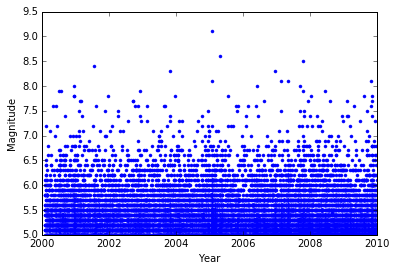

In [6]:
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T
plt.plot(year, magnitude, '.')
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()

Unfortunately, this plot communicates very little information because the data is so cluttered. Describe the data with two or three better visualizations, including line plots, scatter plots, and histograms as appropriate. Your plots
should clearly answer the following questions:

### Q 1. How many earthquakes happened every year?

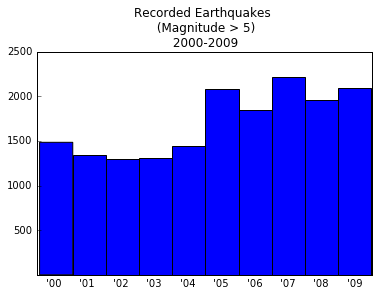

In [7]:
#Put into a histogram
#use 10 bins (2000, 01, 02, 03, 04..., 09 makes 10 years
ax = plt.hist(year,bins=10, lw=1)
#get rid of top bar
plt.tick_params(top="off", bottom="off",right="off")
#label y axis
plt.title("Recorded Earthquakes \n (Magnitude > 5)\n 2000-2009")

#set xticks at each year
plt.xticks(np.arange(2000.5,2010.5), ['\'00', '\'01','\'02','\'03','\'04','\'05','\'06','\'07','\'08','\'09'])
#don't include 0 in yticks
plt.yticks(range(500, 2501, 500))

plt.show()



### Q2. How often do stronger earthquakes happen compared to weaker ones?


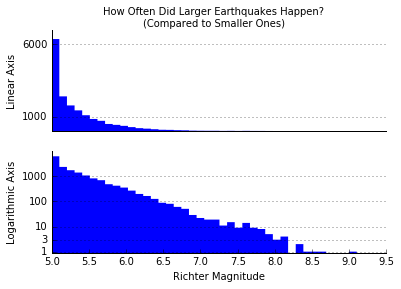

In [8]:
#Again, histogram.  This time, plot both linear and logarithmic, because there are ALOT more small earthquakes

#linear plot
ax = plt.subplot(2,1,1)
plt.ylabel("Linear Axis")
plt.hist(magnitude, bins = 40, lw=0, histtype="stepfilled")

#get rid of top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Get rid of tick junk
plt.tick_params(top="off", right = "off", labelbottom="off")
plt.xticks([])
plt.yticks([1000,6000])

#put lines across for certain y values
plt.grid(axis='y')

#logarithmic plot
ax = plt.subplot(2,1,2)
plt.ylabel("Logarithmic Axis")
plt.xlabel("Richter Magnitude")
plt.hist(magnitude, bins = 40, lw=0, histtype="stepfilled", log=True)

#get rid of top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#and get rid of the ticks
plt.tick_params(top="off", right = "off", which="both")
#get rid of minor ticks
plt.tick_params(which="minor", left="off")

#make logarithmic ticks
plt.yticks([1,3,10,100,1000], [1,3,10,100,1000])

#Put lines across
plt.grid(axis='y')

#set limits
plt.ylim(.9,10**4)

plt.suptitle("How Often Did Larger Earthquakes Happen?\n(Compared to Smaller Ones)")
plt.show()

### Q3. Where do earthquakes happen? Where do the strongest earthquakes happen?

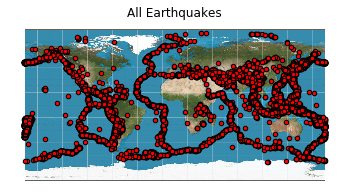

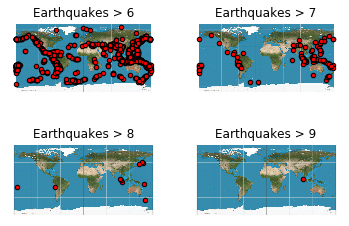

In [38]:
plt.title("All Earthquakes")

#put a picture of the earth underneath this
#map By Strebe - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=16115228
earth = imread("Equirectangular_projection_SW.jpg")
plt.imshow(earth)

#longitude varies from -180 to 180.  x-Pixels vary from 0 to earth.shape[1]
adjusted_longitude = longitude + 180
#scale it from 360 to earth.shape[1]
adjusted_longitude *= earth.shape[1]/360.

#latitude varies from -90 to 90.  Add 90 to make it vary from 0 to -180
adjusted_latitude = latitude - 90

#flip it the other way, because images go backwards
adjusted_latitude *= -1

#scale it from 180 to earth.shape[0]
adjusted_latitude *= earth.shape[0]/180.

plt.scatter(adjusted_longitude, adjusted_latitude, c='r')

#get rid off all the ticks, tick labels, and splines
ax = plt.subplot(111)
plt.xticks([])
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()



for i in [1,2,3,4]:
    ax = plt.subplot(2,2,i)
    plt.imshow(earth)
    plt.title("Earthquakes > %d"%(i+5))
    plt.scatter(adjusted_longitude[magnitude>5+i], adjusted_latitude[magnitude>5+i], c='r')
    
    plt.xticks([])
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
plt.show()